Q. wine.csv로 와의 품종을 예측하는 모델을 텐서플로/케라스로 아래와 같이 생성하고 학습 및 평가를 수행하세요.
- 입력층 :  Input 레이어 shape=(12,)
- 첫번째층 : 30, activation='relu'
- 두번째층 :12, activation='relu'
- 세번째층 :8, activation='relu'
- 출력층 :1, activation='sigmoid'

## 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/wine.csv')

df.head()

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     6496 non-null   float64
 1   0.7     6496 non-null   float64
 2   0       6496 non-null   float64
 3   1.9     6496 non-null   float64
 4   0.076   6496 non-null   float64
 5   11      6496 non-null   float64
 6   34      6496 non-null   float64
 7   0.9978  6496 non-null   float64
 8   3.51    6496 non-null   float64
 9   0.56    6496 non-null   float64
 10  9.4     6496 non-null   float64
 11  5       6496 non-null   int64  
 12  1       6496 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [4]:
df_corr = df.corr()


df_corr_sort = df_corr.sort_values('1',ascending=False)


df_corr_sort['1'].head(10)

,1
1,1.000000
0.7,0.652841
0.076,0.512658
0.56,0.487282
7.4,0.486817
0.9978,0.390491
3.51,0.328801
9.4,-0.032733
5,-0.119107
0,-0.186919


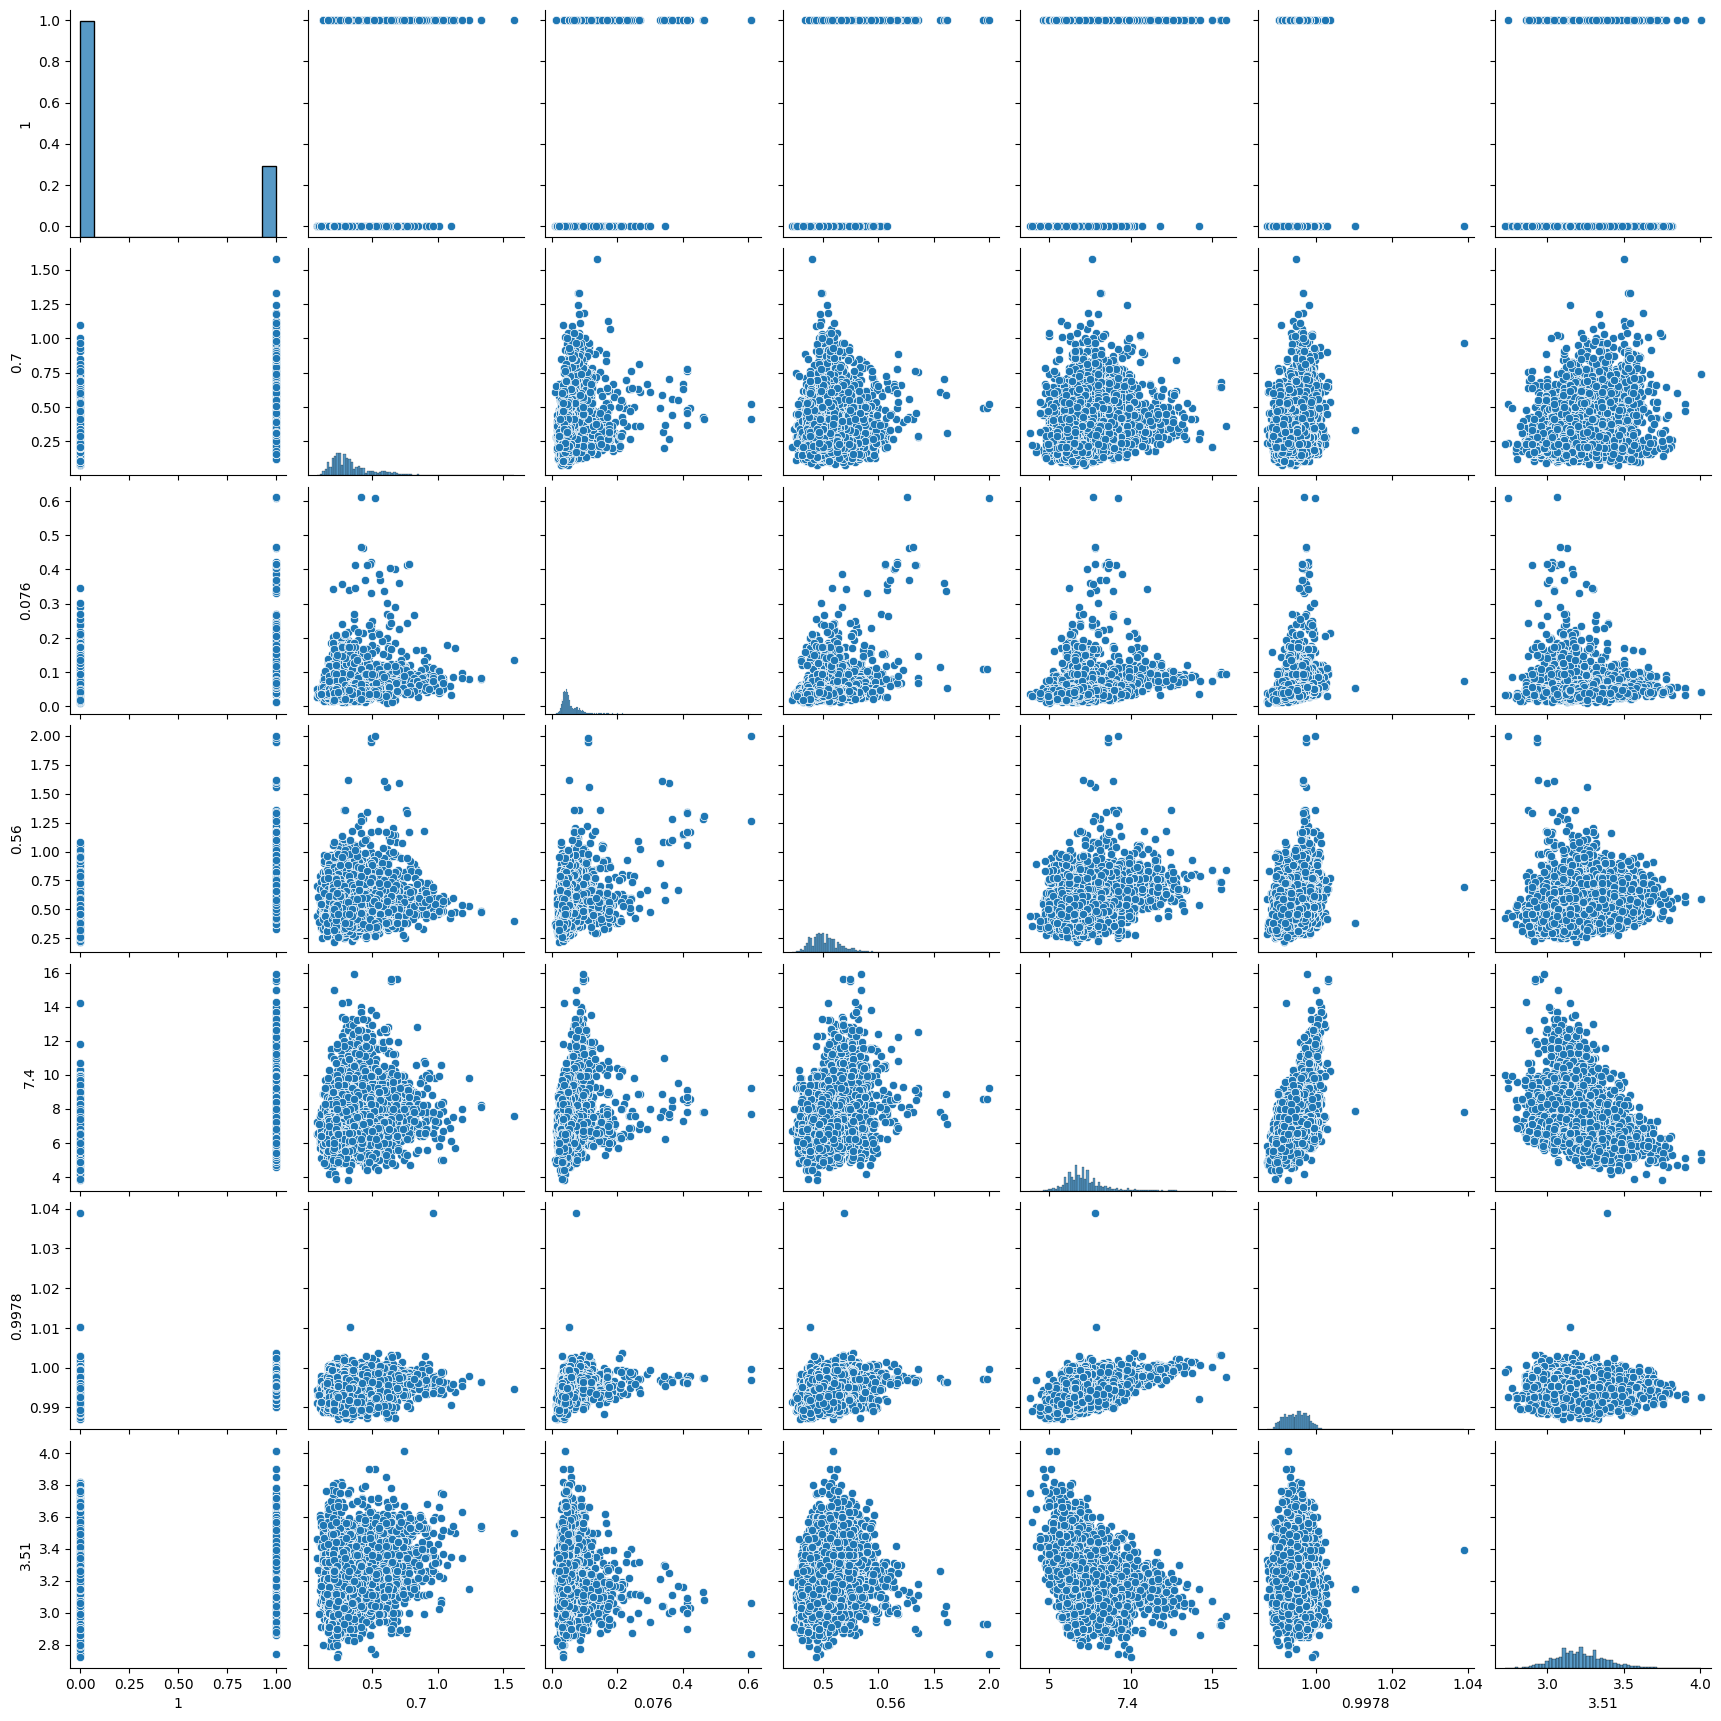

In [7]:
col = ['1','0.7','0.076','0.56','7.4','0.9978','3.51']
sns.pairplot(df[col])
plt.show()

In [ ]:
col_train = ['0.7','0.076','0.56','7.4','0.9978','3.51']
X_train_pre = df[col_train]

y = df['1']

X_tain, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2, shuffle=True, random_state = 123)

model = Sequential()

model.add(Input(shape=(X_train.shape(12),)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,actiavation='sigmoid'))
model.summary()

model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=200, batch_size=32)

test_loss = model.evaluate(X_test,y_test)
print(f"Test Loss : {test_loss}")

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
import random as python_random
import pandas as pd
import numpy as np
import tensorflow as tf

tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/wine.csv',header=None)

df.head()


X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=0)


model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0) # 검증셋 0.8 x 0.25 = 0.2

score = model.evaluate(X_test, y_test)
print('Test accuracy:',score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9351 - loss: 0.1895
Test accuracy: 0.9353846311569214


.keras 파일
- 기본적으로 TensorFlow의 SavedModel 형식을 따릅니다. 이는 TensorFlow의 공식 모델 저장 형식으로, 모델 아키텍처, 가중치, 그리고 훈련 구성(옵티마이저 상태 등)을 포함할 수 있습니다.

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = '/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/{epoch:02d} - {val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath = modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])



Epoch 1: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/01 - 0.9285.keras

Epoch 2: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/02 - 0.9285.keras

Epoch 3: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/03 - 0.9285.keras

Epoch 4: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/04 - 0.9285.keras

Epoch 5: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/05 - 0.9285.keras

Epoch 6: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/06 - 0.9285.keras

Epoch 7: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/07 - 0.9285.keras

Epoch 8: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/08 - 0.9285.keras

Epoch 9: saving model to /content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/all/09 - 0.9285.keras

Epoch 10: saving model to /content/drive/MyDrive/kdt_2

In [11]:
score = model.evaluate(X_test,y_test)
print('Test accuracy:',score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9412 - loss: 0.1586 
Test accuracy: 0.9438461661338806


History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [12]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수도)
history = model.fit(X_train, y_train, epochs=500, batch_size=500, verbose=0, validation_split=0.25)

In [13]:
print(history.history.keys())

print(history.history['loss'])
print(history.history['val_loss'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.1596388965845108, 0.1590126007795334, 0.15836778283119202, 0.1577242761850357, 0.15709231793880463, 0.15643972158432007, 0.15580016374588013, 0.1551600843667984, 0.15449969470500946, 0.15384025871753693, 0.15317554771900177, 0.1524992287158966, 0.15179255604743958, 0.15110044181346893, 0.15040378272533417, 0.149725079536438, 0.1490420550107956, 0.1483568698167801, 0.14768657088279724, 0.14700065553188324, 0.1463378369808197, 0.1456640362739563, 0.14499318599700928, 0.14431244134902954, 0.14364050328731537, 0.14294956624507904, 0.1423037350177765, 0.1416267454624176, 0.14096547663211823, 0.14027923345565796, 0.13961607217788696, 0.1389465481042862, 0.13830448687076569, 0.1376257836818695, 0.1369723528623581, 0.13630661368370056, 0.1356421411037445, 0.1350054144859314, 0.13434378802776337, 0.13367906212806702, 0.13304413855075836, 0.13240236043930054, 0.13175585865974426, 0.13109838962554932, 0.13048431277275085, 0.1298556029

In [14]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.943546,0.159639,0.936923,0.163012
1,0.943546,0.159013,0.936923,0.162326
2,0.943546,0.158368,0.936923,0.161644
3,0.943290,0.157724,0.936923,0.160988
4,0.943290,0.157092,0.936923,0.160294


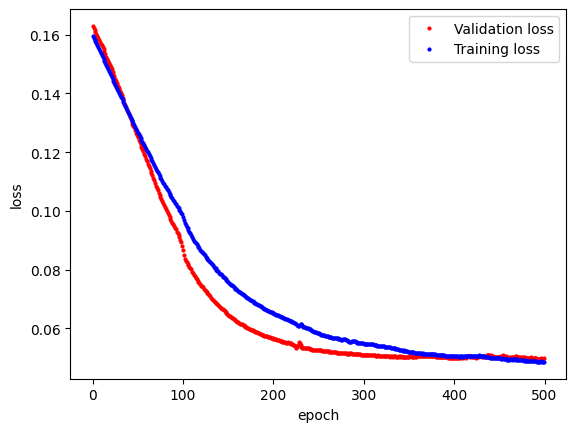

In [15]:
import matplotlib.pyplot as plt

y_vloss = hist_df['val_loss']

y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Validation loss')
plt.plot(x_len, y_loss, 'o', c ='blue', markersize=2, label='Training loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

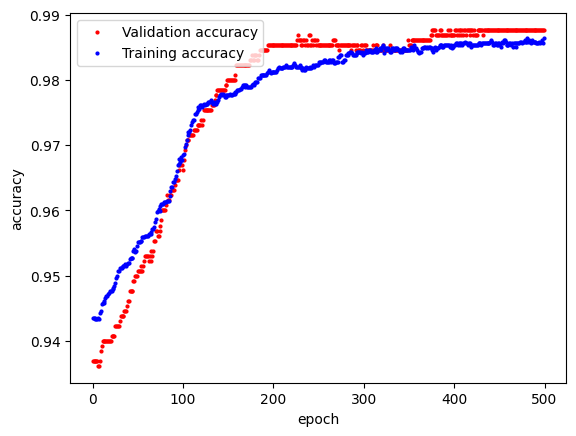

In [18]:
import matplotlib.pyplot as plt

y_acc = hist_df['accuracy']

y_val_acc = hist_df['val_accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_val_acc, 'o', c='red', markersize=2, label='Validation accuracy')
plt.plot(x_len, y_acc, 'o', c ='blue', markersize=2, label='Training accuracy')

plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import random as python_random

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/wine.csv',header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30,  activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

In [25]:
# 학습이 언제 자동 중단 될지 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=30)

# 최적화 모델이 저장될 폴더와 모델의 이름 설정
modelpath = '/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/bestmodel.keras'

# save_best_only 가장 좋은 모델만 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=500, batch_size=500, validation_split=0.25,
                    verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.2473 - loss: 20.9778 - val_accuracy: 0.2115 - val_loss: 14.9281
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2111 - loss: 12.6846 - val_accuracy: 0.1546 - val_loss: 8.0601
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1401 - loss: 6.4213 - val_accuracy: 0.1331 - val_loss: 2.5203
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3309 - loss: 1.7091 - val_accuracy: 0.7615 - val_loss: 0.7878
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7474 - loss: 0.8786 - val_accuracy: 0.7631 - val_loss: 0.9121
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7510 - loss: 0.9741 - val_accuracy: 0.7631 - val_loss: 0.8507
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7511 - loss: 0.8704 - val_accuracy: 0.7638 - val_loss: 0.6574
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7537 - loss: 0.6425 - val_accuracy: 0.7854 - val_loss

In [26]:
score = model.evaluate(X_test,y_test)
print('Test Accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9903 - loss: 0.0343
Test Accuracy: 0.9876922965049744


In [27]:
from tensorflow.keras.models import load_model

# 최적화된 모델이 bestmodel.keras 파일에 저장되면 이 파일을 로드하여 예측  또는 추가 학습에 사용
best_model_path = '/content/drive/MyDrive/kdt_240424/m6_딥러닝/data/model/bestmodel.keras'

model = load_model(best_model_path)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,752 (6.85 KB)